File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
all_data          ID3                0.95            0.97            0.86            0.9             23.8766        


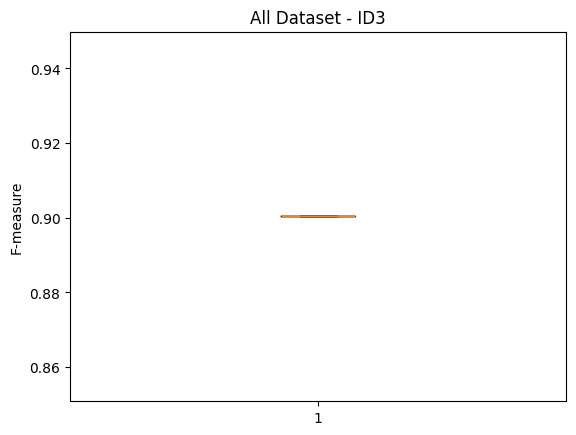

Mission accomplished!
Total operation time: = 254.0745415687561 seconds


In [3]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import time
import warnings
warnings.filterwarnings("ignore")

result = "./results/results_2.csv"  # A CSV file is named in which the results are saved.
csv_files = ["all_data.csv"]  # CSV file names: The names of the dataset files (csv_files).
path = ""
repetition = 10

def folder(f_name):  # This function creates a folder named "results" and "result_graph_2" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("The folder could not be created!")

folder_name = "./results/"
folder(folder_name)
folder_name = "./results/result_graph_2/"
folder(folder_name)

# Only ID3 is kept in the machine learning algorithms dictionary (ml_list).
ml_list = {
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy")
}

# The set of features to be used.
features = {
    "all_data": [
        "Bwd Packet Length Max", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Duration",
        "Flow IAT Max", "Flow IAT Mean", "Flow IAT Min", "Flow IAT Std", "Fwd IAT Total", "Fwd Packet Length Max",
        "Fwd Packet Length Mean", "Fwd Packet Length Min", "Fwd Packet Length Std", "Total Backward Packets",
        "Total Fwd Packets", "Total Length of Bwd Packets", "Total Length of Fwd Packets", "Label"
    ]
}

seconds = time.time()  # Timestamp for all processing time.

with open(result, "w", newline="", encoding="utf-8") as f:  # A CSV file is created to save the results obtained.
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"])

for j in csv_files:  # This loop runs on the list containing the filenames. Operations are repeated for all attack files.
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"))  # Print output header
    feature_list = list(features[j[0:-4]])
    df = pd.read_csv(path + j, usecols=feature_list)  # Read the attack file.
    df = df.fillna(0)
    attack_or_not = []
    
    for i in df["Label"]:  # It changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm.
        if i == "BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"] = attack_or_not

    y = df["Label"]  # This section separates the label and the data into two separate pieces, as Label=y Data=X.
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    for ii in ml_list:  # This loop runs on the list containing the machine learning algorithm names (now only ID3).
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []
        for i in range(repetition):  # This loop allows cross-validation and machine learning algorithm to be repeated 10 times.
            second = time.time()  # Timestamp for processing time.

            # Cross-validation.
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=repetition)

            # Apply ID3 algorithm.
            clf = ml_list[ii]  # Choose the algorithm from ml_list dictionary.
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)

            # Calculate metrics.
            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

        # Print the results of the 10 repetitions on the screen.
        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (
            j[0:-4], ii, str(round(np.mean(accuracy), 2)), str(round(np.mean(precision), 2)),
            str(round(np.mean(recall), 2)), str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))
        ))

        with open(result, "a", newline="", encoding="utf-8") as f:  # Save all the values found in the opened file.
            wrt = csv.writer(f)
            for i in range(0, len(t_time)):
                wrt.writerow([j[0:-4], ii, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])  # Save results in CSV file.

        # Create box plot for the ID3 results.
        plt.boxplot(f1)
        plt.title("All Dataset - " + str(ii))
        plt.ylabel('F-measure')

        # Save the plot without using 'papertype' and 'orientation'
        plt.savefig(folder_name + j[0:-4] + str(ii) + ".pdf", bbox_inches='tight', format='pdf')
        plt.show()  # You can remove the # sign if you want to see the graphics simultaneously.


print("Mission accomplished!")
print("Total operation time: =", time.time() - seconds, "seconds")
